In [1]:
import numpy as np
import pandas as pd

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls ./dataset/

test.csv  train.csv


In [3]:
# read training data from CSV file 
data = pd.read_csv('./dataset/train.csv')

print('data({0[0]},{0[1]})'.format(data.shape))
# print (data.head())

data(42000,785)


In [4]:
data.iloc[:,:].head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
images = data.iloc[:,1:].values

In [6]:
images = images.astype(np.float)

In [7]:
images.shape

(42000, 784)

In [8]:
images.shape

(42000, 784)

In [9]:
image_size  = images.shape[1]

In [10]:
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

In [12]:
def display(img):
    
    # (784) => (28,28)
    img = img[1:]
    one_image = img.values.reshape(image_width,image_height)
    
    axis('off')
    imshow(one_image, cmap=cm.binary)

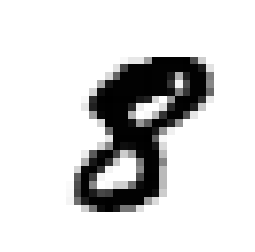

In [13]:
display(data.iloc[10])

In [16]:
labels = data.iloc[:,0]
data_x = data.iloc[:,1:]

In [17]:
from sklearn.preprocessing import LabelBinarizer

def one_hot_encode(x):
    """ One hot encode a list of sample labels. Return a one-hot encoded vector for each label. """
    
    # check if encoder has been previously created, if not make a global var an initialize it
    if 'encoder' not in globals():
        global encoder
        encoder = LabelBinarizer()
        encoder.fit(range(10))
    
    return encoder.transform(x)

labels = one_hot_encode(labels)


In [18]:
cut_index = int(data.shape[0] * 0.1) # Since data is randomly distributed we can use that

x_train, y_train = data_x.head(-cut_index), labels[:-cut_index]
x_val, y_val = data_x.tail(cut_index), labels[-cut_index:]


In [19]:
print("x_train: {}, y_train: {}.".format(x_train.shape, y_train.shape))
print("x_val: {}, y_val: {}.".format(x_val.shape, y_val.shape))


x_train: (37800, 784), y_train: (37800, 10).
x_val: (4200, 784), y_val: (4200, 10).


In [20]:
D =  data.shape[1]-1

In [21]:
x_train.shape

(37800, 784)

In [22]:
M = 28

In [23]:
D, M

(784, 28)

In [24]:
K = 10

In [28]:
# tensor flow variables are not the same as regular Python variables
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def forward(X, W1, b1, W2, b2):
    Z = tf.nn.relu(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

train_iter = 500
# learning_rate =

tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M]) # create symbolic variables
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

logits = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(
    labels=tfY,
    logits=logits
  )
) # compute costs

# train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost) # construct an optimizer

predict_op = tf.argmax(logits, 1)

sess = tf.Session()
sess.run(init)

global_step = tf.Variable(0, trainable=False)
init = tf.global_variables_initializer()

starter_learning_rate = 0.1
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           train_iter, 0.96, staircase=True)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # construct an optimizer

for i in range(train_iter):
    sess.run(train_op, feed_dict={tfX: x_train, tfY: y_train})
    pred = sess.run(predict_op, feed_dict={tfX: x_train, tfY: y_train})
    if i % 10 == 0:
        print("Accuracy:", np.mean(y_train.argmax(axis=1) == pred))


FailedPreconditionError: Attempting to use uninitialized value Variable_9
	 [[Node: Variable_9/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_9"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_9)]]

Caused by op u'Variable_9/read', defined at:
  File "/Users/admin/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/admin/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/admin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-fdcfdc85a038>", line 16, in <module>
    W1 = init_weights([D, M]) # create symbolic variables
  File "<ipython-input-28-fdcfdc85a038>", line 3, in init_weights
    return tf.Variable(tf.random_normal(shape, stddev=0.01))
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 199, in __init__
    expected_shape=expected_shape)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 330, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1400, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/admin/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_9
	 [[Node: Variable_9/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_9"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_9)]]
